In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Emotion Detection In Text
+ Text Classifier

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Load Dataset
df = pd.read_csv("data/emotion-dataset_custom.csv")

In [4]:
df.head()

,id,Emotion,Text
0,1,anger,fuckin'm transtelecom
1,2,anger,Working But it's Fridaaaayyyyy
2,3,anger,Packing I don't like it..
3,4,anger,I tried to dye my hair and all i got was a blo...
4,5,anger,&quot;locked up abroad&quot; makes bein half b...


In [5]:
# Value Counts
df['Emotion'].value_counts()

Emotion
sadness       11887
joy           11045
neutral       10892
worry          8459
surprise       6249
fear           5410
happiness      5209
anger          4407
love           3842
fun            1776
relief         1526
hate           1323
disgust         856
empty           827
enthusiasm      759
boredom         179
shame           146
Name: count, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

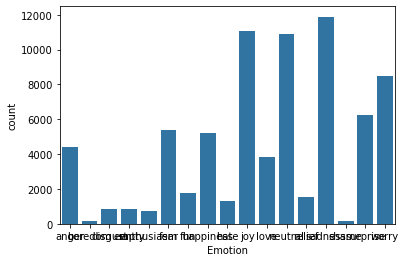

In [6]:
# Plot
sns.countplot(x='Emotion',data=df)

In [10]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
if 'Text' in df.columns:
    # Drop null values if any
    df.dropna(subset=['Text'], inplace=True)

    # Apply remove_userhandles function to the 'Text' column
    df['Clean_Text'] = df['Text'].apply(lambda x: nfx.remove_userhandles(x))

    # Display the DataFrame
    print(df.head())
else:
    print("Error: 'Text' column not found in the DataFrame.")

   id Emotion                                               Text  \
0   1   anger                              fuckin'm transtelecom   
1   2   anger                   Working   But it's Fridaaaayyyyy   
2   3   anger                         Packing  I don't like it..   
3   4   anger  I tried to dye my hair and all i got was a blo...   
4   5   anger  &quot;locked up abroad&quot; makes bein half b...   

                                          Clean_Text  
0                              fuckin'm transtelecom  
1                   Working   But it's Fridaaaayyyyy  
2                         Packing  I don't like it..  
3  I tried to dye my hair and all i got was a blo...  
4  &quot;locked up abroad&quot; makes bein half b...  


In [13]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
df

,id,Emotion,Text,Clean_Text
0,1,anger,fuckin'm transtelecom,fuckin'm transtelecom
1,2,anger,Working But it's Fridaaaayyyyy,Working Fridaaaayyyyy
2,3,anger,Packing I don't like it..,Packing like it..
3,4,anger,I tried to dye my hair and all i got was a blo...,tried dye hair got blond chunk middle hair. Dang.
4,5,anger,&quot;locked up abroad&quot; makes bein half b...,&quot;locked abroad&quot; makes bein half brow...
...,...,...,...,...
74787,74788,worry,tomorrow is going to be sooo awkward &amp; emb...,tomorrow going sooo awkward &amp; embarassing....
74788,74789,worry,"@icebergstorm hey! negative on the primatech, ...","hey! negative primatech, handle's tubes decade..."
74789,74790,worry,@PH7S sure. But be careful also of making stat...,sure. careful making statements it. Parallel i...
74790,74791,worry,How Do You Sleep - Jesse McCartney,Sleep - Jesse McCartney


In [15]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [16]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [17]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.naive_bayes import MultinomialNB  #Multinomial Naive Bayes Model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
pipe_nb = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])
print("Done")

Done


In [19]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [25]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [26]:
pipe_nb.score(x_test,y_test)

0.3686040292387235

In [22]:
print("SVM MODEL")
from sklearn.svm import SVC #SVM Model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

SVM MODEL


In [23]:
pipe_svm = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('svm', SVC(kernel='linear'))
])
print("Pipe")

Pipe


In [24]:
pipe_svm.fit(x_train,y_train) # Took 30 minutes for training(Ubuntu)
print("Training")

Training


In [27]:
pipe_svm

Pipeline(steps=[('tfidf', CountVectorizer()), ('svm', SVC(kernel='linear'))])

In [28]:
pipe_svm.score(x_test,y_test)

0.39886789088964164

In [29]:
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
pipe_rf = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [31]:
pipe_rf.fit(x_train,y_train) 


Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [32]:
pipe_rf

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [33]:
pipe_rf.score(x_test,y_test)

0.367311463719023

In [34]:
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting Classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
pipe_gb = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('gb', GradientBoostingClassifier())
])

In [35]:
pipe_gb.fit(x_train,y_train)


Pipeline(steps=[('tfidf', CountVectorizer()),
                ('gb', GradientBoostingClassifier())])

In [36]:
pipe_gb.score(x_test,y_test)

0.36686575147085043

In [42]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe_dt = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])


In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [43]:
pipe_dt.fit(x_train,y_train) 

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [45]:
pipe_dt.score(x_test,y_test)

0.5420578654914735

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
pipe_knn = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [58]:
pipe_knn.fit(x_train,y_train) 

Pipeline(steps=[('tfidf', CountVectorizer()), ('knn', KNeighborsClassifier())])

In [59]:
pipe_knn.score(x_test,y_test)

0.22782142172830044

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_sgd = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('sgd', SGDClassifier())
])


In [47]:
pipe_sgd.fit(x_train,y_train) 
pipe_sgd.score(x_test,y_test)

0.40207701907648424

In [68]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe_bnb = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('bnb', BernoulliNB())
])
pipe_bnb.fit(x_train,y_train) 
pipe_bnb.score(x_test,y_test)

0.5093887717953631

In [72]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_pa = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('pa', PassiveAggressiveClassifier())
])
pipe_pa.fit(x_train,y_train) 
pipe_pa.score(x_test,y_test)

0.561793447020502

In [75]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_perc = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('perc', Perceptron())
])
pipe_pa.fit(x_train,y_train) 
pipe_pa.score(x_test,y_test)

0.5626556811649741

In [77]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_ridge = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('ridge', RidgeClassifier())
])
pipe_ridge.fit(x_train,y_train) 
pipe_ridge.score(x_test,y_test)

0.6043303314811267

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_adaboost = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('adaboost', AdaBoostClassifier())
])
pipe_adaboost.fit(x_train,y_train) 
pipe_adaboost.score(x_test,y_test)

/home/richforever/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.3337804177045411

In [23]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [24]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [25]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [26]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6200421536692853

In [38]:
# Make A Prediction
ex1 = "Today I gave an Interview, I got an call for internship"

In [40]:
pipe_svm.predict([ex1])

array(['joy'], dtype=object)

In [50]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_sgd = CalibratedClassifierCV(pipe_sgd, method='sigmoid')
calibrated_sgd.fit(x_train, y_train)

# Predict probabilities on the test data
probabilities = calibrated_sgd.predict_proba(x_test)

In [51]:
# To Know the classes
pipe_sgd.classes_

array(['anger', 'boredom', 'disgust', 'empty', 'enthusiasm', 'fear',
       'fun', 'happiness', 'hate', 'joy', 'love', 'neutral', 'relief',
       'sadness', 'shame', 'surprise', 'worry'], dtype='<U10')

In [52]:
#Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_custom_pipe","wb")
joblib.dump(pipe_sgd,pipeline_file)
pipeline_file.close()